[과제함](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D90%2526boardtype%3DL%2526articleid%3D2740%2526referrerAllArticles%3Dfalse)

기한 : 3월 29일 (금) 18시 30분

​과제: 핸즈온 9장 비지도학습​

p. 299 ~ 345 필사하여 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요.
​

# 9장 비지도 학습

# 9.1 군집

## 9.1.1 K-평균

샘플 데이터셋을 생성하고 k-평균 알고리즘을 훈련해보자

In [34]:
import numpy as np
from sklearn.datasets import make_blobs

# 추가 코드 - make_blobs()의 정확한 인수는 중요하지 않습니다.
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

생성된 데이터셋 plotting

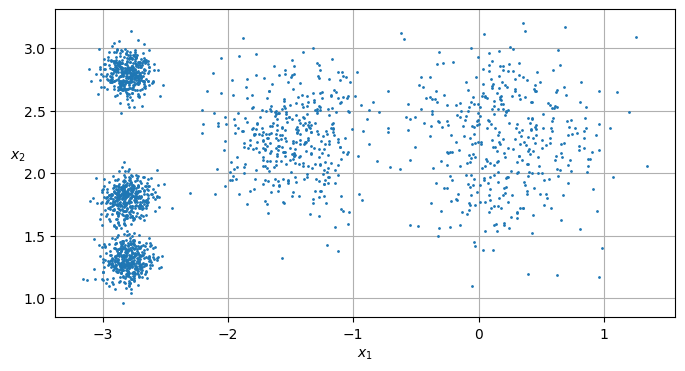

In [35]:
import matplotlib.pyplot as plt

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

이 데이터셋에 k-평균 알고리즘 훈련:\
각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당\

k = 알고리즘이 찾을 클러스터 개수

In [36]:
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


군집에서 각 샘플의 label은 알고리즘이 샘플에 할당한 클러스터의 인덱스이다\
(분류에서의 클래스 label과 혼동하지 말기)\
(remind: 분류는 지도학습이고 군집은 비지도학습)

In [37]:
y_pred

array([4, 0, 1, ..., 2, 1, 0], dtype=int32)

In [38]:
y_pred is kmeans.labels_

True

In [39]:
# 알고리즘이 찾은 센트로이드 다섯 개 (k=5) 확인
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [40]:
# 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당
X_new = np.array([[0,2], [3,2], [-3,3], [-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

**클러스터의 결정 경계 그리기: Voronoi diagram**\
(센트로이드: x로 표시됨)

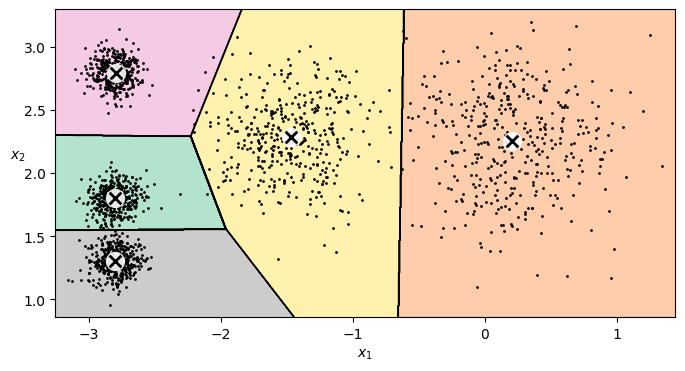

In [41]:
# 추가 코드 (그림 9-3)

def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

나쁘지 않습니다! 가장자리 근처의 샘플 중 일부는 아마도 잘못된 클러스터에 할당되었을 수 있지만 전반적으로 꽤 괜찮아 보입니다.

**하드 군집 _vs_ 소프트 군집**

* 하드 군집: 샘플을 하나의 클러스터에 할당
* 소프트 군집: 클러스터마다 샘플에 점수를 부여하는 것
  * 점수는 i.e. 샘플과 센트로이드 사이의 거리\
  (KMeans 클래스의 transform() 메서드)
  * 가우시안 방사기저 함수와 같은 유사도 점수

* 하드 클러스터링: 각 샘플에 대해 가장 가까운 클러스터를 선택함
* 이 대신 각 샘플과 5개의 중심까지의 거리를 측정하는 것이 더 나을 수 있습니다: 이것이 바로 `transform()` 메서드가 하는 일입니다

In [42]:
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

이것이 실제로 각 샘플과 각 중심 사이의 유클리드 거리임을 확인할 수 있습니다:

In [43]:
# 추가 코드
np.linalg.norm(np.tile(X_new, (1, k)).reshape(-1, k, 2)
               - kmeans.cluster_centers_, axis=2).round(2)

array([[2.81, 0.33, 2.9 , 1.49, 2.89],
       [5.81, 2.8 , 5.85, 4.48, 5.84],
       [1.21, 3.29, 0.29, 1.69, 1.71],
       [0.73, 3.22, 0.36, 1.55, 1.22]])

### K-평균 알고리즘

K-평균 알고리즘은 가장 빠른 클러스터링 알고리즘 중 하나이며 가장 간단한 알고리즘이기도 합니다:
* 먼저 $k$개의 중심을 무작위로 초기화합니다. 예를 들어, 데이터 세트에서 $k$개의 샘플을 무작위로 선택하고 해당 위치에 센트로이드를 할당합니다.
* 수렴할 때까지(즉, 중심이 움직이지 않을 때까지) 반복합니다:
    * 각 인스턴스를 가장 가까운 센트로이드에 할당합니다.
    * 할당된 샘플의 평균이 되도록 센트로이드를 업데이트합니다.

`K-Means` 클래스는 기본적으로 최적화된 초기화 기법을 사용함

원래 K-평균 알고리즘에서는 센트로이드가 무작위로 초기화되고 알고리즘은 위에서 살펴본 것처럼 단일 반복을 실행하여 센트로이드를 점진적으로 개선하기만 하면 됩니다.

그러나 이 접근 방식의 한 가지 주요 문제점은 아래에서 볼 수 있듯이 K-Means를 여러 번(또는 다른 무작위 시드를 사용하여) 실행하면 매우 다른 솔루션으로 수렴할 수 있다는 점입니다:

**센트로이드 초기화 방법**

init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 n_init을 1로 설정

In [44]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

**모델의 intertia**
* `n_init`: 랜덤 초기화 개수 조절 (default = 10)\
랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택
* 최선의 솔루션을 찾는 데 사용하는 KMeans 모델 성능 지표: intertia
* 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리
* KMeans 클래스는 알고리즘을 n_init번 실행하여 intertia가 가장 낮은 모델을 반환
* `kmeans.inertia_` 로 확인 가능

In [45]:
kmeans.inertia_

211.5985372581684

쉽게 확인할 수 있듯이 관성은 각 훈련 샘플과 가장 가까운 센트로이드 사이의 제곱 거리의 합입니다:

In [46]:
# 추가 코드
X_dist = kmeans.transform(X)
(X_dist[np.arange(len(X_dist)), kmeans.labels_] ** 2).sum()

211.59853725816868

`score()` 메서드는 음의 이너셔를 반환합니다. 왜 음수일까요? 예측기의 `score()` 메서드는 항상 "_크면 클수록 좋다_"는 규칙을 준수해야 하기 때문입니다.

In [47]:
kmeans.score(X)

-211.59853725816836

따라서 가변성 문제를 해결하기 위한 한 가지 접근 방식은 다양한 무작위 초기화를 사용하여 K-평균 알고리즘을 여러 번 실행하고 이너셔를 최소화하는 솔루션을 선택하는 것입니다.

`n_init` 하이퍼파라미터를 설정하면 Scikit-Learn은 원래 알고리즘인 `n_init`을 여러 번 실행하여 이너셔를 최소화하는 솔루션을 선택합니다. 기본적으로 Scikit-Learn은 `n_init=10`으로 설정되어 있습니다.

In [48]:
# 추가 코드
kmeans_rnd_10_inits = KMeans(n_clusters=5, init="random", n_init=10,
                             random_state=2)
kmeans_rnd_10_inits.fit(X)

KMeans(init='random', n_clusters=5, n_init=10, random_state=2)

다음에 보듯이 최적의 K-평균 솔루션에 해당하는 초기 모델을 얻었습니다(적어도 관성 측면에서, 그리고 $k=5$라고 가정할 때).

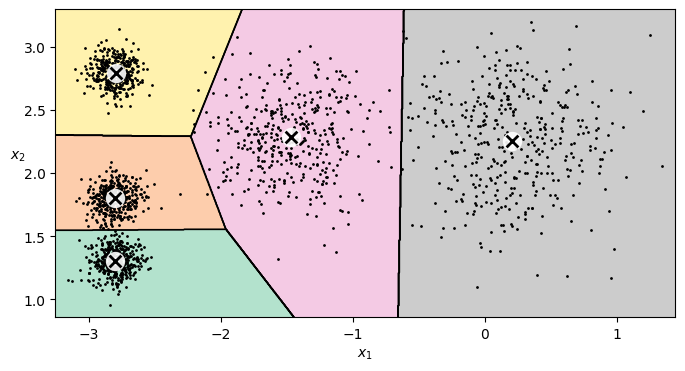

In [49]:
# 추가 코드
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_rnd_10_inits, X)
plt.show()

In [50]:
kmeans_rnd_10_inits.inertia_

211.5985372581684

### KMeans 속도 개선과 미치배치 KMeans
`MiniBatchKMeans` 클래스 알고리즘: 전체 데이터셋을 사용해 반복하지 않고 각 반복마다 미니배치를 사용해 센트로이드를 조금씩 이동
* 일반적으로 알고리즘의 속도를 3~4배 높임

데이터셋이 메모리에 들어가지 않을 땐:
* (가장 간단) 8장의 점진적 PCA에서 했던 것처럼 memmap 클래스 사용
* MiniBatchKMeans 클래스의 `partial_fit()` 메서드에 한번에 하나의 미니배치를 전달
  * 하지만 초기화를 여러 번 수행하고 만들어진 결과에서 가장 좋은 것을 직접 골라야 하기 때문에 할 일이 많음

In [51]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5)
minibatch_kmeans.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=5)

### 최적의 클러스터 개수 찾기

* 실루엣 점수 `silhouette_score()`: 모든 샘플에 대한 평균 실루엣 계수
* 샘플의 실루엣 계수 = $(b-a)/max(a,b)$
  * a = 동일한 클러스터에 있는 다른 샘플과의 평균 거리(클러스터 내부의 평균 거리)
  * b = 가장 가까운 클러스터(의 샘플)까지의 평균 거리
* 실루엣 계수는 -1에서 +1 사이
  * +1에 가까우면 샘플이 자체 클러스터 내부에 있고 다른 클러스터와 멀리 떨어져 있음을 의미
  * 0에 가까우면 클러스터 경계에 가깝다는 의미
  * -1에 가까우면 샘플이 잘못된 클러스터에 할당되었을 수 있음을 의미

실루엣 점수를 $k$의 함수로 플롯해 보겠습니다:

In [52]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

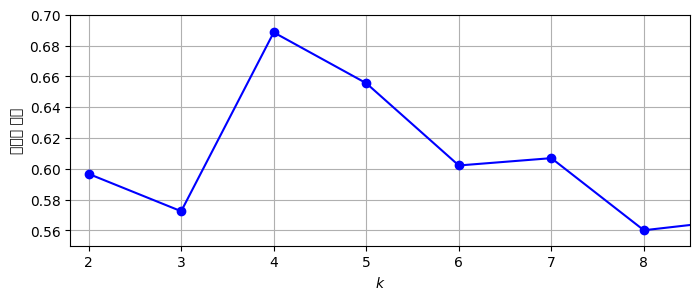

In [53]:
# 추가 코드 - 클러스터 개수를 달리하여 실루엣 점수를 비교

kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]

silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("실루엣 점수")
plt.axis([1.8, 8.5, 0.55, 0.7])
plt.grid()
plt.show()

보시다시피, 이 시각화는 이전 시각화보다 훨씬 더 풍부합니다. 특히 $k=4$가 매우 좋은 선택이라는 것을 확인하지만, $k=5$도 상당히 좋다는 사실도 강조합니다.

**실루엣 다이어그램**

모든 샘플의 실루엣 계수를 할당된 클러스터와 계수 값에 따라 정렬하여 플로팅하면 훨씬 더 많은 정보를 시각화할 수 있습니다.
* 높이: 클러스터가 포함하고 있는 샘플의 개수
* 너비: 클러스터에 포함된 샘플의 정렬된 실루엣 계수 (넓을수록 좋음)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53364 (\N{HANGUL SYLLABLE KEUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47084 (\N{HANGUL SYLLABLE REO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53552 (\N{HANGUL SYLLABLE TEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49892 (\N{HANGUL SYLLABLE SIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

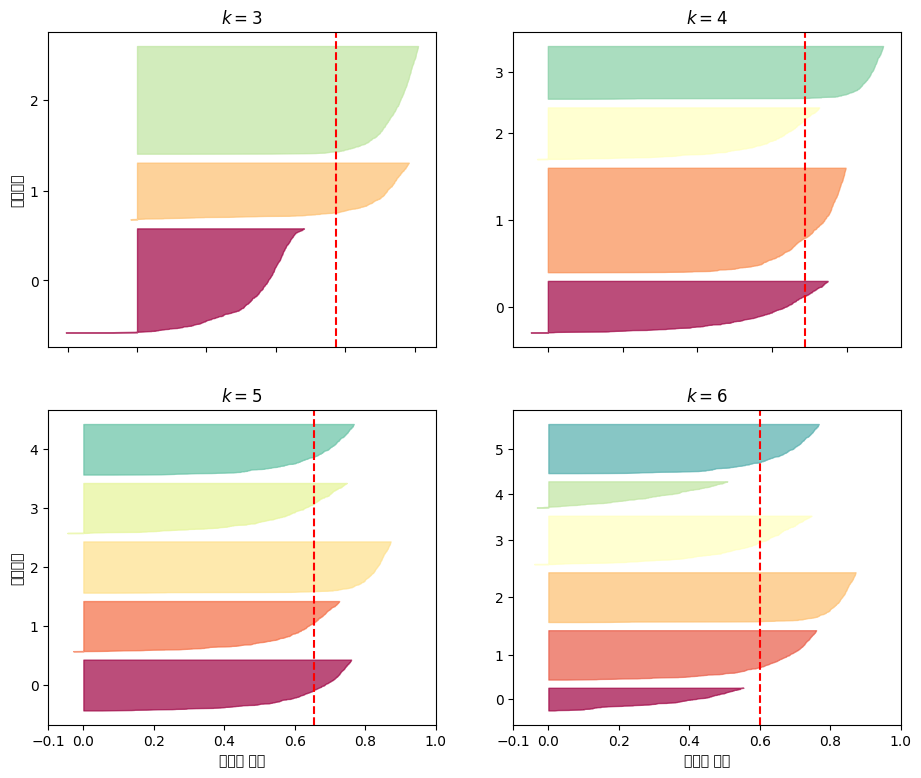

In [54]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)

    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("클러스터")

    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("실루엣 계수")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$")

plt.show()

보시다시피 모든 클러스터의 크기가 거의 같고 평균 실루엣 점수를 나타내는 점선을 모두 교차하기 때문에 $k=5$가 가장 좋은 옵션으로 보입니다.

## 9.1.2 K-평균의 한계

* KMeans는 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않음
* KMeans를 실행하기 전에 입력 특성의 스케일을 맞추는 것이 중요
* 그렇지 않으면 클러스터가 길쭉해지고 KMeans의 결과가 좋지 않음
* 특성의 스케일을 맞춘다고 모든 클러스터가 잘 구분되고 원형의 형태를 가진다고 보장할 수는 없지만 일반적으로 더 좋아짐

## 9.1.3 군집을 사용한 이미지 분할

* **Image segmentation**: 이미지를 세그먼트 여러 개로 분할하는 작업
* Semantic segmentation에서는 동일한 종류의 물체에 속한 모든 픽셀은 같은 세크먼트에 할당
* Semantic or instance segmentation 에서 최고 수준의 성능을 내려면 합성곱 신경망을 사용한 복잡한 모델을 사용해야함

훨씬 쉬운 작업인 color segmentation을 수행하겠다
* 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

무당벌레 이미지를 다운로드합니다:

In [55]:
from pathlib import Path
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

In [56]:
# 추가 코드 - 무당벌레 이미지 다운로드

import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [57]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

* 이 이미지는 3D 배열로 표현됨
  1. 높이
  2. 너비
  3. 컬러 채널 개수 (RGB 채널)\
  각 픽셀에 대해 RGB의 강도를 담은 3D 벡터\
  (0.0과 1.0 사이, `imageio.imread()`를 사용한다면 0과 255 사이)
  
* 어떤 이미지는 더 적은 채널을 가짐\
(i.e. 흑백이미지: 채널 하나)
* 어떤 이미지는 더 많은 채널을 가짐\
(i.e. 알파채널: 투명도,\
위성 이미지: 전자기파에 대한 채널(들) 포함)


In [58]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

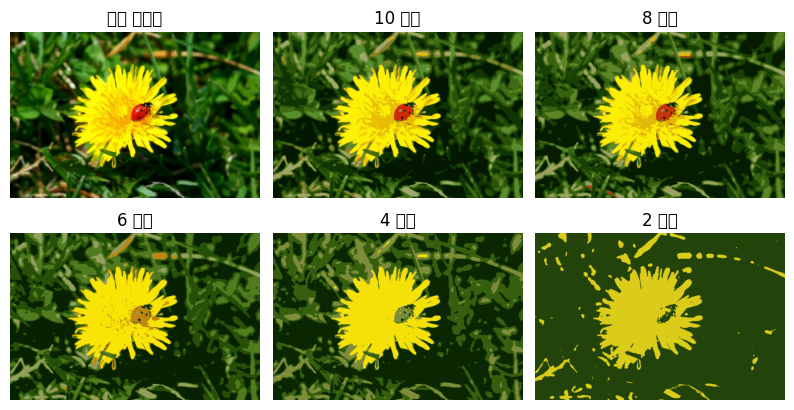

In [59]:
# 추가 코드 - 다양한 클러스터 개수로 만든 이미지 분할 using KMeans

segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("원본 이미지")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} 색상")
    plt.axis('off')

plt.show()

## 9.1.4 군집을 사용한 전처리

군집은 차원 축소에 효과적인 방법이다


In [60]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [62]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
log_reg.score(X_test, y_test)

0.9644444444444444

KMeans를 전처리 단계로 사용해 더 좋아지는지 확인해보자


```
숫자가 10개 이므로 클러스터 개수를 10개로 지정할 수 있다.
하지만 숫자를 쓴 방식이 저마다 다르기 때문에
50처럼 클러스터 개수를 더 크게 하는 것이 좋다.
```



In [64]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50)),
    ("log_reg", LogisticRegression())
])
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('kmeans', KMeans(n_clusters=50)),
                ('log_reg', LogisticRegression())])

In [65]:
pipeline.score(X_test, y_test)

0.9444444444444444

엥 점수가 똑같이 나옴..ㅠㅠ

GridSearchCV를 사용해 최적의 클러스터 개수 k를 찾는다

In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2,100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, )

## 9.1.5 군집을 사용한 준지도 학습

군집의 또 다른 사용 사례는 레이블이 지정되지 않은 샘플이 많고 레이블이 지정된 샘플이 매우 적은 경우의 준지도 학습입니다.

레이블이 지정된 샘플이 50개만 있을 때 로지스틱 회귀 모델의 성능을 살펴보겠습니다:

In [67]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [68]:
log_reg.score(X_test, y_test)

0.7933333333333333

물론 이전보다는 훨씬 적습니다. 어떻게 하면 더 잘할 수 있는지 살펴봅시다. 먼저 훈련 세트를 50개의 클러스터로 모은 다음 각 클러스터에 대해 센트로이드에 가장 가까운 이미지를 찾아보겠습니다. 이 이미지를 대표 이미지라고 부르겠습니다:

In [69]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = X_digits_dist.argmin(axis=0)
X_representative_digits = X_train[representative_digit_idx]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


이제 이러한 대표 이미지를 플로팅하고 수동으로 레이블을 지정해 보겠습니다:

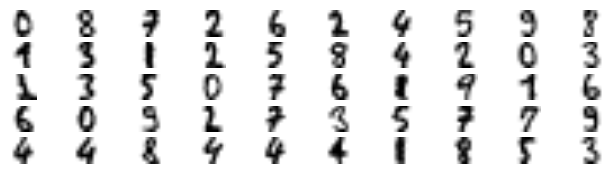

In [70]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')
plt.show()

이미지를 보고 수동으로 레이블 할당

In [75]:
y_representative_digits = np.array([
    0,8,7,2,6,2,4,5,9,8,
    1,3,1,2,5,8,4,2,0,3,
    1,3,5,0,7,6,8,9,1,6,
    6,0,9,2,7,3,5,7,7,9,
    4,4,8,4,4,4,1,8,5,3
])

이제 50개의 레이블이 지정된 샘플만 있는 데이터 세트가 있지만, 완전히 무작위 샘플이 아니라 각 샘플이 클러스터의 대표 이미지입니다. 성능이 더 좋아졌는지 살펴봅시다:

In [76]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9022222222222223

정확도가 79.3%에서 90.2%로 뛰어올랐지만, 아직 50개의 샘플로만 모델을 훈련하고 있습니다. 샘플에 레이블을 지정하는 작업은 비용이 많이 들고 번거로운 경우가 많으며, 특히 전문가가 수동으로 수행해야 하는 경우에는 무작위 샘플보다는 대표적인 샘플에 레이블을 지정하는 것이 좋습니다.

하지만 한 단계 더 나아가 동일한 클러스터의 다른 모든 샘플에 레이블을 전파하면 어떨까요?

**레이블 전파 label propagation**

In [77]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [78]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train, y_train_propagated)

LogisticRegression(max_iter=10000)

In [79]:
log_reg.score(X_test, y_test)

0.8955555555555555

엥 정확도 떨어짐...



> 문제는 각 대표 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파한 것입니다.

> 여기에는 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있고 아마 잘못 레이블이 부여되었을 것

센트로이드와 가까움 샘플의 20%에만 레이블을 전파해보자




In [80]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [81]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8933333333333333

엥 더 떨어짐..!!ㅠㅠㅠㅠ

In [83]:
# 실제 데이터와 유사도
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9757785467128027

**능동 학습**
* 전문가가 학습 알고리즘과 상호작용하여 알고리즘이 요청할 때 특정 샘플의 레이블을 제공
* 널리 사용되는 전략: 불확실성 샘플링 uncertainty sampling
1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련합니다. 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만듭니다.
2. 모델이 가장 불확실하게 예측한 샘플(즉, 추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙입니다.
3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복합니다.

## DBSCAN
인기 높은 군집 알고리즘
* 국부적인 밀집도를 추정
* 임의의 모양을 클러스터를 식별할 수 있음

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [85]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

In [ ]:
dbscan.core_sample_indices_[:10]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13])

In [ ]:
dbscan.components_

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       ...,
       [ 1.66258462, -0.3079193 ],
       [-0.94355873,  0.3278936 ],
       [ 0.79419406,  0.60777171]])

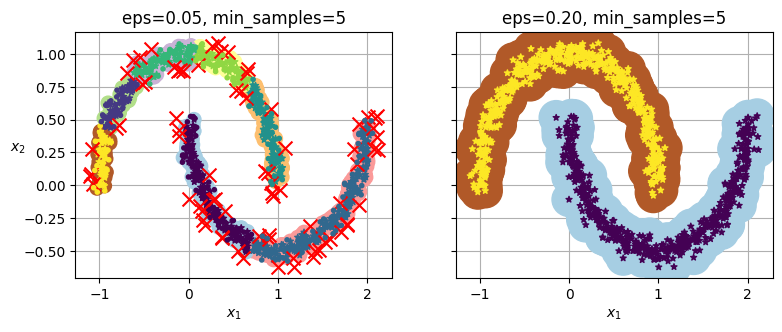

In [87]:
# 추가 코드

def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20,
                c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1],
                c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)

plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

In [88]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [89]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [90]:
knn.predict_proba(X_new)

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

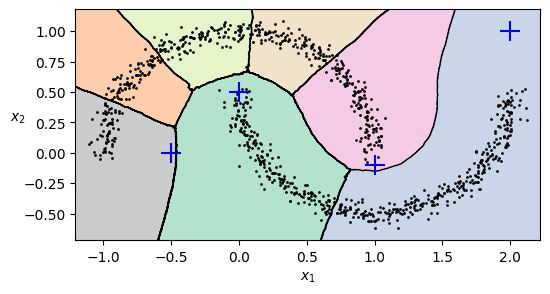

In [91]:
# 추가 코드

plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)

plt.show()

In [92]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  0,  3, -1])

## 9.1.7 다른 군집 알고리즘

### 병합 군집
* 클러스터 계츨을 밑바닥부터 위로 쌓아 구성
* 처음에는 샘플 하나에서 시작해 반복마다 인접한 클러스터 쌍을 연결
* 병합된 클러스터 쌍을 트리로 모두 그리면 클러스터의 binary tree 얻을 수 있음
* 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지할 수 있음
* 특정 클러스터 개수를 선택하는 데 도움되는 유용한 클러스터 트리를 만들 수 있음

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X = np.array([0, 2, 5, 8.5]).reshape(-1, 1)
agg = AgglomerativeClustering(linkage="complete").fit(X)

In [ ]:
def learned_parameters(estimator):
    return [attrib for attrib in dir(estimator)
            if attrib.endswith("_") and not attrib.startswith("_")]

In [ ]:
learned_parameters(agg)

['children_',
 'labels_',
 'n_clusters_',
 'n_connected_components_',
 'n_features_in_',
 'n_leaves_']

In [ ]:
agg.children_

array([[0, 1],
       [2, 3],
       [4, 5]])

### BIRCH
* 특별히 대규모 데이터셋을 위해 고안됨
* 특성 개수가 너무 많지 않다면 (20개 이하) batch kmeans보다 빠르고 비슷한 결과 도출

### 평균이동
* 각 샘플을 중심으로 하는 원을 그림
* 원마다 안에 포함된 모든 샘플의 평균을 구함
* 평균점으로 원의 중심을 이동시킴
* 모든 원이 움직이지 않을 때까지 이 평균이동 mean-shift를 계속함
* DBSCAN처럼 모양이나 개수에 상관없이 클러스터를 찾을 수 있음
* 오직 하나의 하이퍼파라미터: bandwidth (원 반경)

### 유사도 전파
### 스펙트럼 군집

# 9.2 가우스 혼합

(K-평균이 문제를 겪었던) 앞서와 동일한 세 개의 타원형 클러스터를 가진 데이터셋을 생성해 보겠습니다:

In [106]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [108]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

EM 알고리즘이 추정하는 파라미터를 살펴보겠습니다:

In [109]:
gm.weights_

array([0.39025715, 0.40007391, 0.20966893])

In [110]:
gm.means_

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [111]:
gm.covariances_

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

알고리즘이 실제로 수렴했나요?

In [112]:
gm.converged_

True

네, 좋아요. 몇 번의 반복이 필요했나요?

In [113]:
gm.n_iter_

4

이제 모델을 사용하여 각 샘플이 어느 클러스터에 속하는지(하드 클러스터링) 또는 각 클러스터에서 나올 확률을 예측할 수 있습니다. 이를 위해 `predict()` 메서드 또는 `predict_proba()` 메서드를 사용하면 됩니다:

In [114]:
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [115]:
gm.predict_proba(X).round(3)

array([[0.977, 0.   , 0.023],
       [0.983, 0.001, 0.016],
       [0.   , 1.   , 0.   ],
       ...,
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ]])

이 모델은 생성형 모델이므로 이 모델에서 새 샘플을 샘플링하고 레이블을 가져올 수 있습니다:

In [116]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [117]:
y_new

array([0, 0, 1, 2, 2, 2])

각 클러스터에서 순차적으로 샘플링되는 것을 확인할 수 있습니다.

또한 `score_samples()` 메서드를 사용하여 어느 위치에서나 _확률 밀도 함수_(PDF)의 로그를 추정할 수 있습니다:

In [ ]:
gm.score_samples(X).round(2)

array([-2.61, -3.57, -3.33, ..., -3.51, -4.4 , -3.81])

PDF가 전체 공간에 걸쳐 1로 통합되는지 확인해 보겠습니다. 클러스터 주위의 큰 정사각형을 작은 정사각형 그리드로 잘라낸 다음 각 작은 정사각형에서 인스턴스가 생성될 대략적인 확률을 계산한 다음(작은 정사각형의 한쪽 모서리에 있는 PDF에 정사각형의 면적을 곱하고 마지막으로 이 모든 확률을 합산합니다), 그 결과를 확인합니다. 결과는 1에 매우 가깝습니다:

In [118]:
# 추가 코드 - 보너스 자료

resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T

pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
pdf_probas.sum()

0.9999999999215022

`covariance_type` 하이퍼파라미터를 설정하여 알고리즘이 찾는 공분산 행렬에 제약 조건을 적용할 수 있습니다:
* `"spherical"`: 모든 클러스터는 구형이어야 하지만 직경이 다를 수 있습니다(즉, 분산이 다를 수 있음).
* `"diag"`: 클러스터는 모든 크기의 타원형 모양을 취할 수 있지만 타원의 축은 축과 평행해야 합니다(즉, 공분산 행렬이 대각선이어야 함).
* `"tied"`: 모든 클러스터는 동일한 모양을 가져야 하며, 이는 타원체일 수 있습니다(즉, 모두 동일한 공분산 행렬을 공유해야 함).
* `"full"` (기본값): 제약 없이 모든 클러스터는 모든 크기의 타원형 모양을 취할 수 있습니다.

## 9.2.1 가우스 혼합을 사용한 이상치 탐지

가우스 혼합은 이상치 탐지에 사용할 수 있습니다: 저밀도 영역에 위치한 샘플을 이상치로 간주할 수 있습니다. 사용하려는 밀도 임계값을 정의해야 합니다. 예를 들어, 결함이 있는 제품을 감지하려는 제조 회사에서는 일반적으로 결함이 있는 제품의 비율을 잘 알고 있습니다. 이 비율이 2%라고 가정하면, 임계값 밀도 아래에 있는 샘플이 2%가 되도록 하는 값으로 밀도 임계값을 설정할 수 있습니다:

In [119]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 2)
anomalies = X[densities < density_threshold]

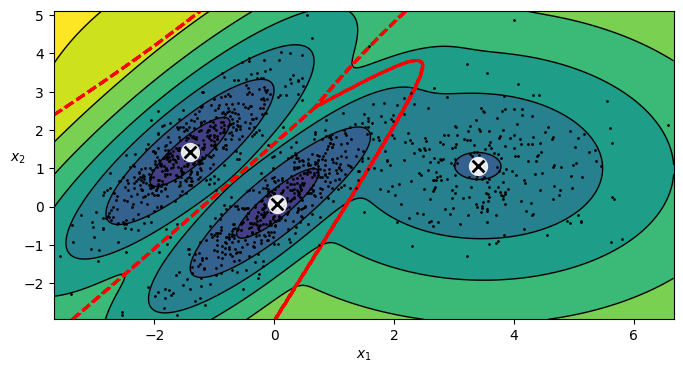

In [120]:
# 추가 코드 - plot_gaussian_mixture

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$")
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)

plt.figure(figsize=(8, 4))

plot_gaussian_mixture(gm, X)
plt.show()

추가 코드 - covariance_type 을 tied 또는 spherical로 지정했을 때 EM 알고리즘으로 찾은 솔루션

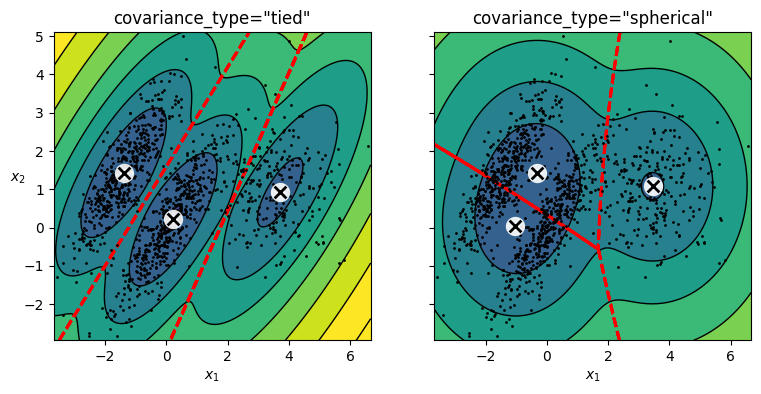

In [121]:
gm_full = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10,
                               covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10,
                          covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title(f'covariance_type="{gm1.covariance_type}"')

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title(f'covariance_type="{gm2.covariance_type}"')

compare_gaussian_mixtures(gm_tied, gm_spherical, X)

plt.show()

## 9.2.2 클러스터 수 선택하기

이너셔 또는 실루엣 점수는 모두 클러스터가 구형이라고 가정하기 때문에 사용할 수 없습니다. 대신 BIC 또는 AIC와 같은 이론적 정보 기준을 최소화하는 모델을 찾을 수 있습니다:
${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

* $m$은 샘플 수입니다.
* $p$는 모델에서 학습한 파라미터의 수입니다.
* $L$은 모델의 가능도 함수의 최대값입니다. 이것은 모델과 최적화된 파라미터가 주어졌을 때 관찰된 데이터 $\mathbf{X}$의 조건부 확률입니다.

BIC와 AIC는 모두 학습할 파라미터가 많은 모델(예: 더 많은 클러스터)에 불이익을 주고, 데이터에 잘 맞는 모델(예: 관찰된 데이터에 높은 가능성을 부여하는 모델)에 보상을 줍니다.

In [122]:
gm.bic(X)

8189.747000497186

In [123]:
gm.aic(X)

8102.521720382148

In [124]:
# 추가 코드 - 수동으로 BIC를 계산
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X) # log(L^)
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(f"bic = {bic}")
print(f"aic = {aic}")
print(f"n_params = {n_params}")

bic = 8189.747000497186
aic = 8102.521720382148
n_params = 17


클러스터당 가중치는 하나이지만 합은 1과 같아야 하므로 자유도가 하나 적고 따라서 1을 뺍니다. 마찬가지로, $n \times n$ 공분산 행렬의 자유도는 $n^2$가 아니라 $1 + 2 + \dots + n = \dfrac{n (n+1)}{2}$입니다.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


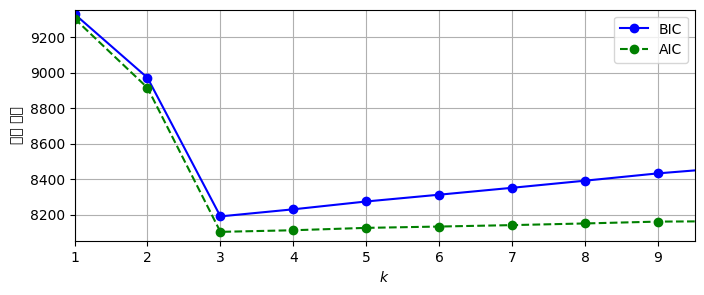

In [125]:
# 추가 코드 - 다양한 값의 k로 가우시안 혼합 모델을 훈련하고 BIC, AIC plot

gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X)
             for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$")
plt.ylabel("정보 조건")
plt.axis([1, 9.5, min(aics) - 50, max(aics) + 50])
plt.legend()
plt.grid()
plt.show()

## 9.2.3 베이즈 가우스 혼합 모델

최적의 클러스터 수를 수동으로 검색하는 대신 불필요한 클러스터의 가중치를 0으로 (또는 0에 가깝게) 부여할 수 있는 `BayesianGaussianMixture` 클래스를 사용할 수 있습니다. 성분 개수를 최적의 클러스터 수보다 큰 값으로 설정하기만 하면 알고리즘이 불필요한 클러스터를 자동으로 제거합니다.

In [126]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
bgm.weights_.round(2)

array([0.4 , 0.21, 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

알고리즘이 자동으로 3개의 성분만 필요하다는 것을 감지했습니다

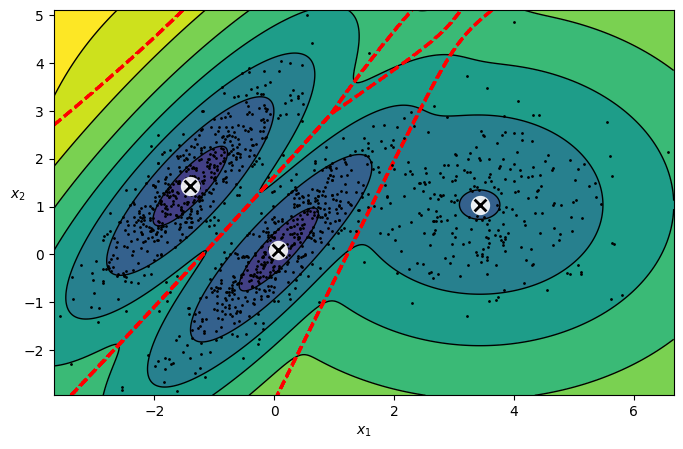

In [127]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

### 9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘

**PCA**\
(and other dim red techniques with the inverse_transform() method)


**Fast-MCD**
(Minimum Covariance Determinant)
* EllipticEnvelope 클래스에서 구현된 알고리즘
* 타원형을 잘 추정하고 이상치 감지에 유용
* 특히 데이터셋을 정제할 때 사용됨
* 가정: 샘플 정상치가 혼합된 것이 아니라 하나의 가우시안 분포에서 생성되었다고 가정하고 이 분포에서 생성되지 않은 이상치로 데이터셋이 오염되었다고 봄

**아이솔레이션 포레스트**\
**LOF**\
**one-class SVM**